<a href="https://colab.research.google.com/github/re71var/Topo/blob/main/elninov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# plotting
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt

##Lectura de Datos

In [ ]:
#data_inx= pd.read_csv('sstoi.indices.txt', header = None)
data_anom= pd.read_csv('/content/drive/MyDrive/nino34.long.anom.data.txt', header = None)

In [ ]:
#print(data_inx.head())
print(data_anom.head())

                                                   0
0   1870    -1.00   -1.20   -0.83   -0.81   -1.27...
1   1871    -0.25   -0.58   -0.43   -0.50   -0.70...
2   1872    -0.72   -0.62   -0.50   -0.77   -0.62...
3   1873    -0.78   -1.01   -1.31   -0.67   -0.53...
4   1874    -0.93   -1.06   -1.40   -0.94   -0.86...


In [ ]:
f = open('/content/drive/MyDrive/uke_eggedal_data_challenge.pkl', 'rb')  
mydict = pickle.load(f)
f.close()

In [ ]:
print('Coordenadas:')
print(mydict['obs_lon_lat'])

Coordenadas:
[9.37, 60.23]


In [ ]:
#flow
flow=pd.DataFrame(mydict['flow'])
flow.columns=['flow']
##dates 
flow_dates=pd.DataFrame(mydict['flow_dates'])
flow_dates.columns=['flow_dates']
flow_dates=flow_dates.reset_index()
flow_dates=flow_dates.drop(columns=['index'])
#obs
obs_dates=pd.DataFrame(mydict['obs_dates'])
obs_dates.columns=['obs_dates']
obs_dates=obs_dates.reset_index()
obs_dates=obs_dates.drop(columns=['index'])
#tas
obs_tas=pd.DataFrame(mydict['obs_tas'])
obs_tas.columns = ['obs_tas1', 'obs_tas2', 'obs_tas3', 'obs_tas4','obs_tas5','obs_tas6','obs_tas7','obs_tas8','obs_tas9']
#pr
obs_pr=pd.DataFrame(mydict['obs_pr'])
obs_pr.columns = ['obs_pr1', 'obs_pr2', 'obs_pr3', 'obs_pr4','obs_pr5','obs_pr6','obs_pr7','obs_pr8','obs_pr9']


In [ ]:
data_pkl_flow=pd.concat([flow_dates,flow], axis=1)
data_pkl_obs=pd.concat([obs_dates,obs_tas,obs_pr],axis=1)

In [ ]:
print(data_pkl_flow.head())
print(data_pkl_obs.head())

  flow_dates      flow
0 1958-01-04  1.723781
1 1958-01-05  0.960882
2 1958-01-06  0.001000
3 1958-01-07  0.001000
4 1958-01-08  0.316796
   obs_dates   obs_tas1  obs_tas2  obs_tas3   obs_tas4   obs_tas5   obs_tas6  \
0 1957-01-01 -10.600000      -9.7      -6.7  -8.800000  -8.900000  -7.500000   
1 1957-01-02 -20.500000     -19.1     -12.0 -17.700001 -17.700001 -13.100000   
2 1957-01-03 -23.600000     -22.5     -15.1 -21.400000 -21.400000 -16.299999   
3 1957-01-04 -16.200001     -16.0     -14.1 -15.600000 -15.400000 -14.500000   
4 1957-01-05  -7.900000      -7.8      -9.5  -7.600000  -7.500000  -8.000000   

   obs_tas7  obs_tas8  obs_tas9  obs_pr1  obs_pr2  obs_pr3  obs_pr4  obs_pr5  \
0      -8.1      -6.5      -5.4      0.0      0.0      0.0      0.0      0.0   
1     -15.5     -11.8      -9.1      0.0      0.0      0.0      0.0      0.0   
2     -19.4     -14.6     -12.2      0.1      0.0      0.3      0.1      0.3   
3     -15.0     -13.8     -11.9      1.0      0.0      1.0   

##Limpieza de datos (nino34)

In [ ]:
df =pd.read_csv("/content/drive/MyDrive/nino34.long.anom.data.txt", header=None, delim_whitespace=True)#anomalias de la region 34

In [ ]:
df.isnull().sum()
df.duplicated().sum()


0

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14


In [ ]:
#Un overview
df.describe

<bound method NDFrame.describe of        0     1      2      3      4      5      6      7      8      9   \
0    1870 -1.00  -1.20  -0.83  -0.81  -1.27  -1.08  -1.04  -0.88  -0.53   
1    1871 -0.25  -0.58  -0.43  -0.50  -0.70  -0.53  -0.60  -0.33  -0.24   
2    1872 -0.72  -0.62  -0.50  -0.77  -0.62  -0.52  -0.32  -0.85  -1.02   
3    1873 -0.78  -1.01  -1.31  -0.67  -0.53  -0.48  -0.58  -0.39  -0.34   
4    1874 -0.93  -1.06  -1.40  -0.94  -0.86  -0.72  -1.00  -1.05  -1.13   
..    ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
145  2015  0.59   0.57   0.48   0.90   1.04   1.28   1.56   1.87   2.01   
146  2016  2.56   2.11   1.60   1.05   0.45   0.06  -0.25  -0.48  -0.46   
147  2017 -0.34  -0.01  -0.09   0.22   0.30   0.22   0.22  -0.18  -0.56   
148  2018 -0.86  -0.73  -0.73  -0.36  -0.12   0.12   0.27   0.05   0.30   
149  2019  0.51 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99 -99.99   

        10     11     12  
0    -0.92  -0.79  -0.79  
1    -0.33 

In [ ]:
#Renombramos las columnas
df2 = df.rename(columns={col: f'column{i+1}' for i, col in enumerate(df.columns)}, inplace=True)

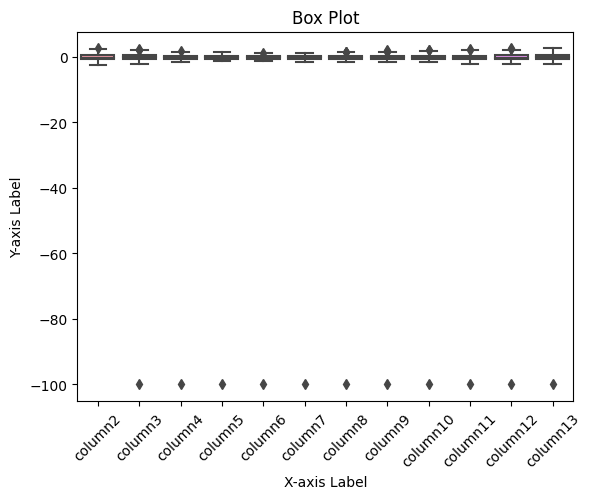

In [ ]:
import seaborn as sns
#Boxplot
sns.boxplot(data=df.drop('column1', axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
min(df['column3'])

-99.99

##Datos atípicos (nino34)

In [ ]:
for columns in df:
  for i in range(len(df['column3'])):
    if df['column3'][i]==-99.99:
      df['column3'][i]=0

<ipython-input-17-0569c13a63c1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column3'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column4'])):
    if df['column4'][i]==-99.99:
      df['column4'][i]=0

<ipython-input-18-280d4e01cbfd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column4'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column5'])):
    if df['column5'][i]==-99.99:
      df['column5'][i]=0

<ipython-input-19-8f1d964cb014>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column5'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column6'])):
    if df['column6'][i]==-99.99:
      df['column6'][i]=0

<ipython-input-20-dadba27c52d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column6'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column7'])):
    if df['column7'][i]==-99.99:
      df['column7'][i]=0

<ipython-input-21-417728f1cb98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column7'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column8'])):
    if df['column8'][i]==-99.99:
      df['column8'][i]=0

<ipython-input-22-5269bffce4fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column8'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column9'])):
    if df['column9'][i]==-99.99:
      df['column9'][i]=0

<ipython-input-23-e21f5befd3a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column9'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column10'])):
    if df['column10'][i]==-99.99:
      df['column10'][i]=0

<ipython-input-24-80416e4a8160>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column10'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column11'])):
    if df['column11'][i]==-99.99:
      df['column11'][i]=0

<ipython-input-25-a3faf86c57cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column11'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column12'])):
    if df['column12'][i]==-99.99:
      df['column12'][i]=0

<ipython-input-26-8d493122bda5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column12'][i]=0


In [ ]:
for columns in df:
  for i in range(len(df['column13'])):
    if df['column13'][i]==-99.99:
      df['column13'][i]=0

<ipython-input-27-b4586e954e43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['column13'][i]=0


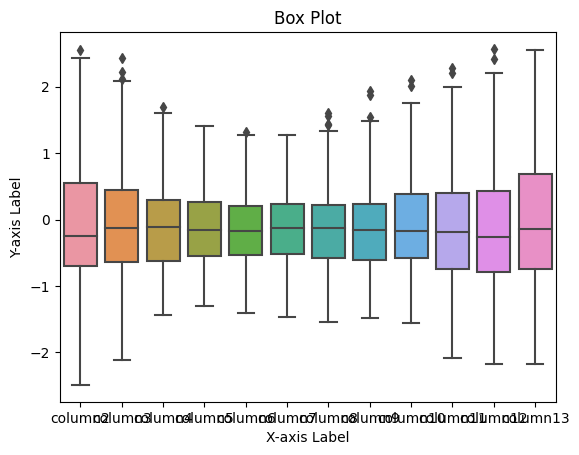

In [ ]:
sns.boxplot(data=df.drop('column1', axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")

# Show the plot
plt.show()

##Limpieza de datos (sstoi indices)

In [ ]:
df_sstoi =pd.read_csv("/content/drive/MyDrive/sstoi.indices.txt", header=None, delim_whitespace=True) #12 registros por año, con temperatura y anomalia por region

In [ ]:
# Quitar primera fila de nombres porque estorba
sstoi = df_sstoi.iloc[1:]

In [ ]:
sstoi.head()

,0,1,2,3,4,5,6,7,8,9
1,1982,1,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
2,1982,2,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
3,1982,3,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
4,1982,4,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
5,1982,5,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49


In [ ]:
#Renombramos las columnas
df2 = sstoi.rename(columns={col: f'column{i+1}' for i, col in enumerate(sstoi.columns)}, inplace=True)

<ipython-input-32-da39138953a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2 = sstoi.rename(columns={col: f'column{i+1}' for i, col in enumerate(sstoi.columns)}, inplace=True)


In [ ]:
sstoi.dtypes

column1     object
column2     object
column3     object
column4     object
column5     object
column6     object
column7     object
column8     object
column9     object
column10    object
dtype: object

In [ ]:
#Valores nulos y/o repetidos 
sstoi.isnull().sum()
sstoi.duplicated().sum()

0

In [ ]:
sstoi.describe()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10
count,496,496,496,496,496,496,496,496,496,496
unique,42,12,389,259,309,248,224,213,276,241
top,1982,1,25.71,-0.69,24.18,-0.05,28.83,0.15,27.28,0.08
freq,12,42,3,7,5,9,10,8,7,6


In [ ]:
# Object -> float
sstoi= sstoi.astype(float)

In [ ]:
sstoi.head()

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10
1,1982.0,1.0,24.28,-0.24,25.84,0.17,28.01,-0.21,26.65,0.08
2,1982.0,2.0,25.38,-0.72,26.26,-0.11,27.99,-0.11,26.54,-0.20
3,1982.0,3.0,25.22,-1.38,26.92,-0.25,28.18,-0.05,27.09,-0.14
4,1982.0,4.0,24.57,-1.16,27.52,-0.05,28.61,0.10,27.83,0.02
5,1982.0,5.0,24.00,-0.62,27.70,0.49,29.19,0.40,28.37,0.49


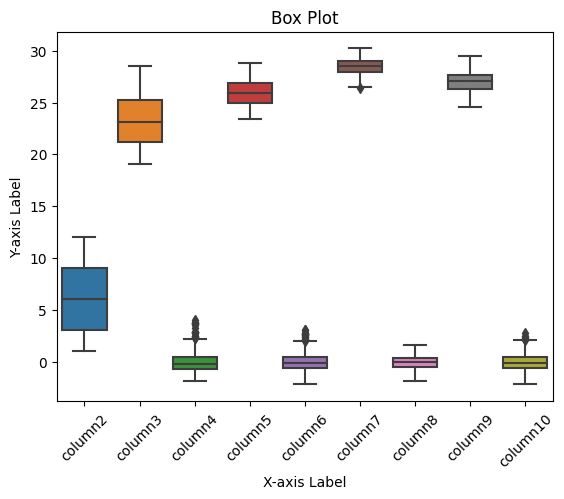

In [ ]:
#Boxplot
sns.boxplot(data=sstoi.drop('column1', axis=1))

# Set plot title and labels
plt.title("Box Plot")
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Series de tiempo

In [ ]:
!pip install sktime
!pip install plotly-express
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install giotto-tda 
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.0/118.0 kB 12.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-gqbyxx3g
  Running command git clone --filter=blob:none --quiet https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-gqbyxx3g
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit 0e3cfd59c82c21c42da55cd24ee944b44aa0d9ad
  Preparing metadata (setup.py) ... done
  Created wheel for nolitsa: filename=nolitsa-0.1-py3-none-any.whl size=22185 sha256=9bea0cad8f0ba89270f8b7a0f3ef99504cdbd8642c39cfd7c0ac50da7232cfb6
  Stored in directory: /tm

In [ ]:
import pandas as pd
import numpy as np
import sktime
from sktime.datasets import load_uschange
import plotly_express as px
import plotly.graph_objs as go
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud
from nolitsa import dimension, delay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

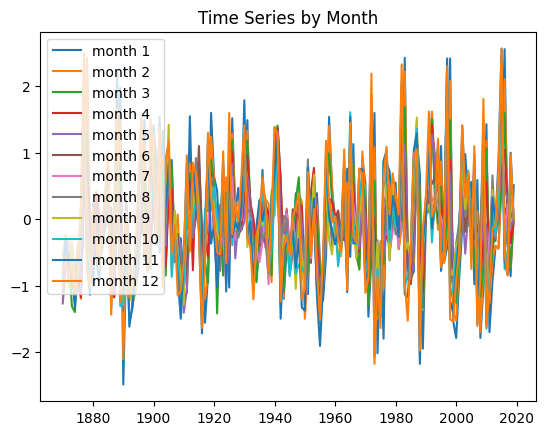

In [ ]:
for i in range(14):
  if i > 1:
    col = 'column' + str(i)
    m = 'month ' + str(i-1)
    plt.plot(df['column1'], df[col], label = m)
plt.title('Time Series by Month')
plt.legend()
plt.show()

In [ ]:
df['column1'].count()

150

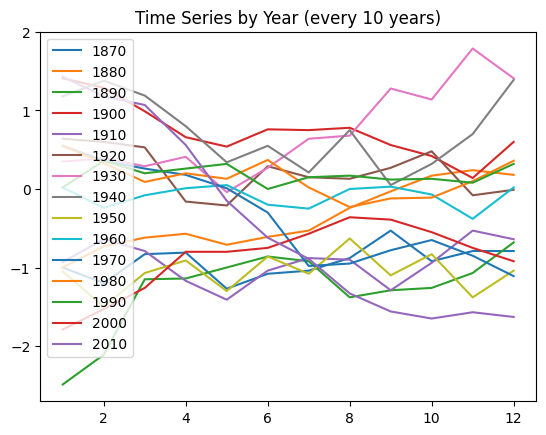

In [ ]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12]
       
for i in range(150):
  if i % 10 == 0:
    m = 'mes ' + str(i-1)
    dfByMonth = [df['column2'][i], df['column3'][i], df['column4'][i], df['column5'][i], df['column6'][i], df['column7'][i], df['column8'][i], df['column9'][i], df['column10'][i], df['column11'][i], df['column12'][i], df['column13'][i]]
    plt.plot(cols, dfByMonth, label = df['column1'][i])
plt.legend()
plt.title('Time Series by Year (every 10 years)')
plt.show()

In [ ]:
lista = []
for i in range(149):
  for n in range(12):
    col = 'column'+str(n+2)   
    lista.append(df[col][i])

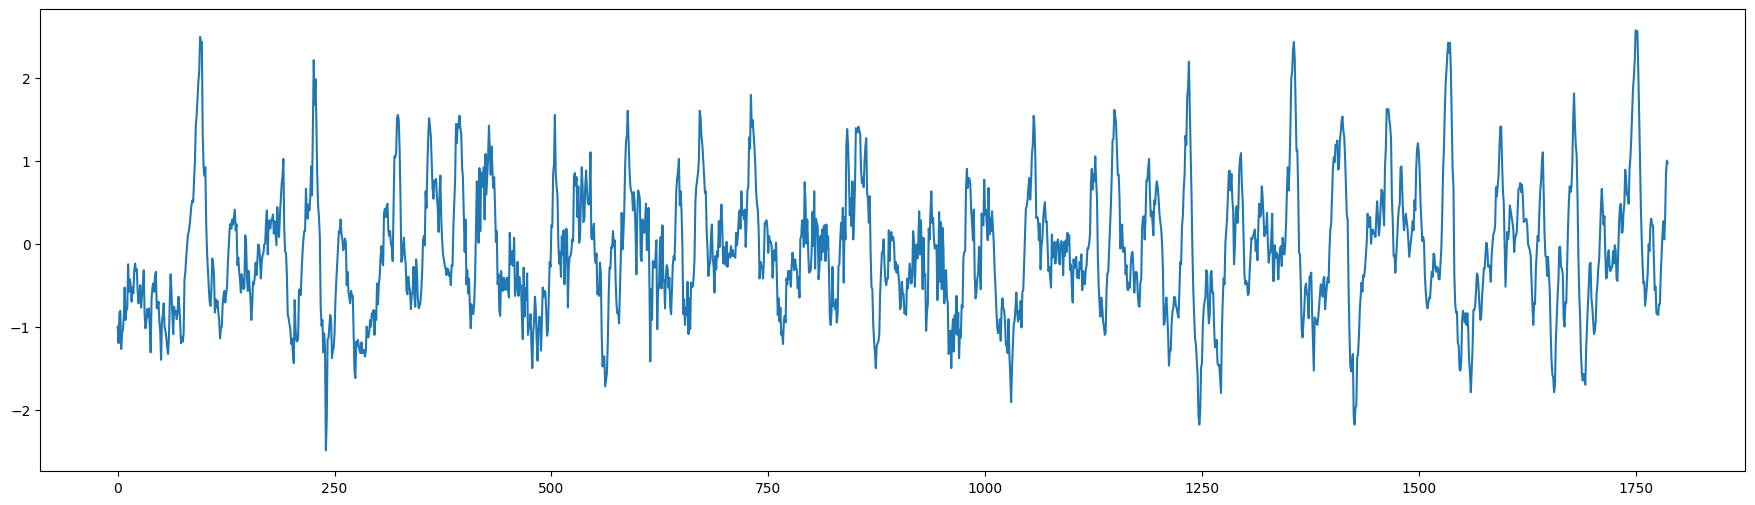

In [ ]:
plt.figure(figsize=(22,6))
plt.plot(list(range(len(lista))),lista)
plt.show()

In [ ]:
dfmelted = df.melt(id_vars=['column1'], var_name="Month").sort_values(by=['column1','Month'])

In [ ]:
!pip install git+https://github.com/manu-mannattil/nolitsa.git
!pip install giotto-tda 
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/manu-mannattil/nolitsa.git to /tmp/pip-req-build-fcv8ocoz
  Running command git clone --filter=blob:none --quiet https://github.com/manu-mannattil/nolitsa.git /tmp/pip-req-build-fcv8ocoz
  Resolved https://github.com/manu-mannattil/nolitsa.git to commit 0e3cfd59c82c21c42da55cd24ee944b44aa0d9ad
  Preparing metadata (setup.py) ... done
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
max_periodic_dimension=60
max_periodic_time_delay=60
stride=1
tau,d= takens_embedding_optimal_parameters(lista, max_periodic_dimension, max_periodic_time_delay, stride)
print('Optimal time delay: ', tau,'\nOptimal dimension: ', d)

Optimal time delay:  16 
Optimal dimension:  8


In [ ]:
embedder_periodic = SingleTakensEmbedding(parameters_type="search", time_delay=max_periodic_time_delay,
    dimension=max_periodic_dimension)
y_periodic_embedded = embedder_periodic.fit_transform(lista)
print("El delay encontrado es ", embedder_periodic.time_delay_)
print("El dimension encontrado es ", embedder_periodic.dimension_)

pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

El delay encontrado es  16
El dimension encontrado es  8


In [ ]:
embedding_dimension_periodic = 8
embedding_time_delay_periodic = 16
stride = 1
embedder_periodic = SingleTakensEmbedding(
    parameters_type="fixed",
    n_jobs=2,
    time_delay=embedding_time_delay_periodic,
    dimension=embedding_dimension_periodic,
    stride=stride,
)

y_periodic_embedded = embedder_periodic.fit_transform(lista)
print(f"Shape of embedded time series: {y_periodic_embedded.shape}")
pca = PCA(n_components=3)
y_periodic_embedded_pca = pca.fit_transform(y_periodic_embedded)
plot_point_cloud(y_periodic_embedded_pca)

Shape of embedded time series: (1676, 8)


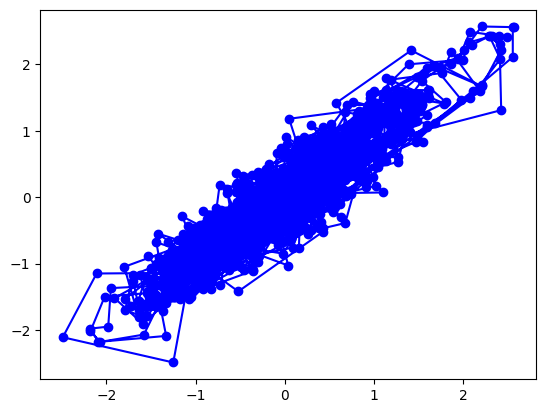

In [ ]:
def embed(points,DimEmb=2):
    auxembed=[]
    for i in range(0,len(points)-DimEmb+1):
        aux=[points[i+j] for j in range(DimEmb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed

embededcos=embed(lista,DimEmb=2)
plt.plot(embededcos[:,0],embededcos[:,1],marker='o',color='blue')

In [ ]:
!pip install ripser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ripser: filename=ripser-0.6.4-cp310-cp310-linux_x86_64.whl size=687038 sha256=11d05f01f597e40dfb6f29b69d380de1b4a2ac60f28c5f77fff5ed06204b93c1
  Stored in directory: /root/.cache/pip/wheels/c5/f5/66/f41f708b049057431155934f74e20ca6001a085fcd2e615150
  Created wheel for hopcroftkarp: filename=hopcroftkarp-1.2.5-py2.py3-none-any.whl size=18102 sha256=2d99692d542fdc8fd589a0efbb5fe09c00e3f8658e0917c958b59771569b563a
  Stored in directory: /root/.cache/pip/wheels/ef/0f/3b/0f931844eecc34addd90e72d54cd39c08b7066c5f25c00b9a4
Successfully built rip

In [ ]:
import ripser
import persim

In [ ]:
ripsernonperiod=ripser.ripser(embededcos)['dgms']

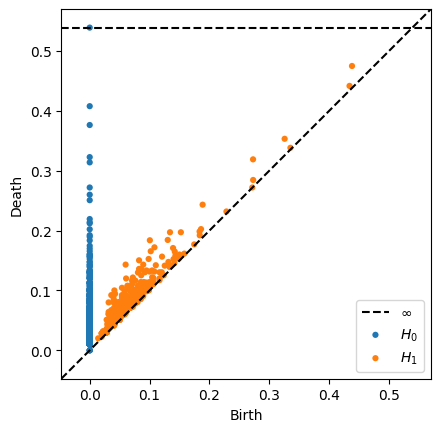

In [ ]:
persim.plot_diagrams(
    ripsernonperiod, 
    show=True
) 

In [ ]:
import numpy as np
import pandas as pd
from gtda.time_series import SingleTakensEmbedding, takens_embedding_optimal_parameters
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_point_cloud
import plotly.graph_objects as go
from nolitsa import dimension, delay
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [ ]:
df

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,column11,column12,column13
0,1870,-1.00,-1.20,-0.83,-0.81,-1.27,-1.08,-1.04,-0.88,-0.53,-0.92,-0.79,-0.79
1,1871,-0.25,-0.58,-0.43,-0.50,-0.70,-0.53,-0.60,-0.33,-0.24,-0.33,-0.31,-0.58
2,1872,-0.72,-0.62,-0.50,-0.77,-0.62,-0.52,-0.32,-0.85,-1.02,-0.94,-0.79,-0.88
3,1873,-0.78,-1.01,-1.31,-0.67,-0.53,-0.48,-0.58,-0.39,-0.34,-0.78,-0.77,-0.70
4,1874,-0.93,-1.06,-1.40,-0.94,-0.86,-0.72,-1.00,-1.05,-1.13,-1.25,-1.33,-1.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2015,0.59,0.57,0.48,0.90,1.04,1.28,1.56,1.87,2.01,2.21,2.57,2.56
146,2016,2.56,2.11,1.60,1.05,0.45,0.06,-0.25,-0.48,-0.46,-0.75,-0.63,-0.51
147,2017,-0.34,-0.01,-0.09,0.22,0.30,0.22,0.22,-0.18,-0.56,-0.52,-0.84,-0.85
148,2018,-0.86,-0.73,-0.73,-0.36,-0.12,0.12,0.27,0.05,0.30,0.84,1.00,0.97


In [ ]:
x_periodic=df['column1']
y_periodic= df.drop(columns='column1')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x_periodic, y=y_periodic, mode='markers', name='periodic signal'))
fig.show()

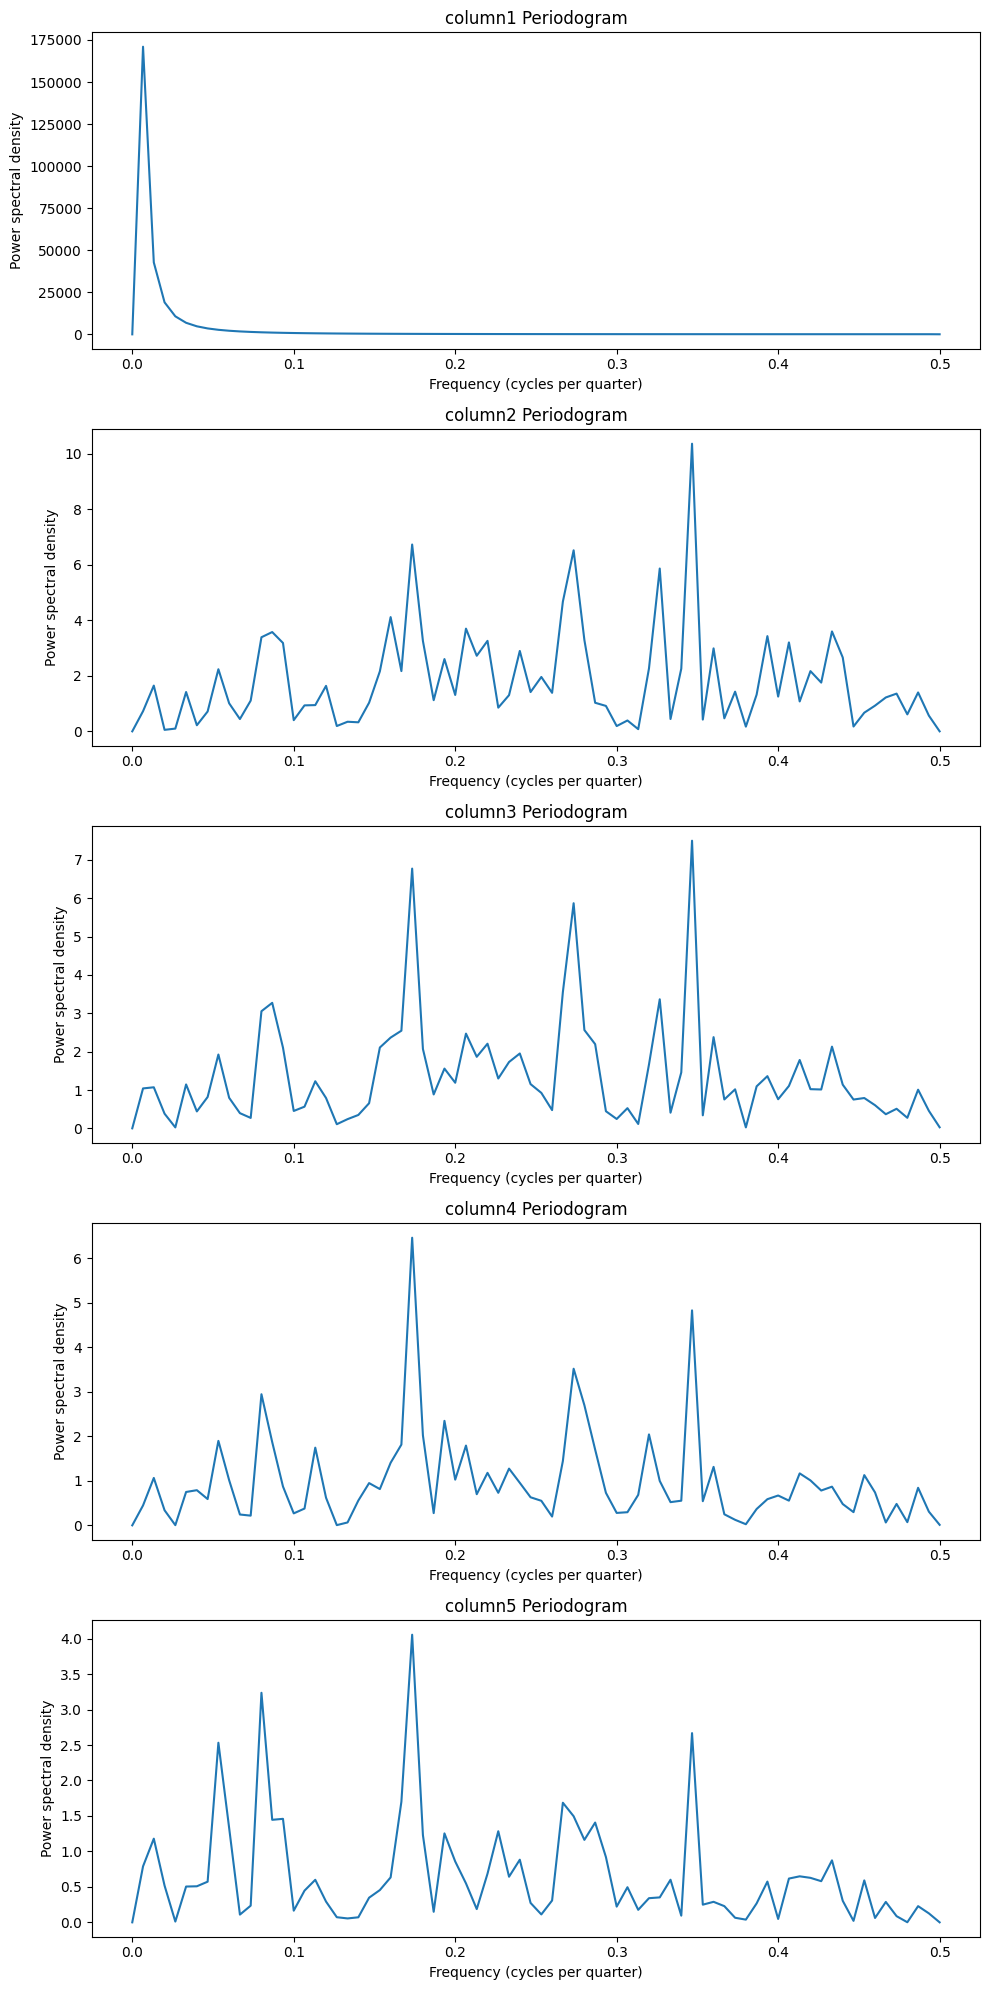

In [ ]:
from scipy.signal import periodogram
y = df.loc[:, ['column1', 'column2','column3','column4','column5']] 
fig, axs = plt.subplots(nrows=len(y.columns), figsize=(10, 20))

for i, col in enumerate(y.columns):
    # Compute periodogram
    f, Pxx = periodogram(y[col])

    # Plot results
    axs[i].plot(f, Pxx)
    axs[i].set_xlabel('Frequency (cycles per quarter)')
    axs[i].set_ylabel('Power spectral density')
    axs[i].set_title(col + ' Periodogram')

plt.tight_layout()
plt.show()

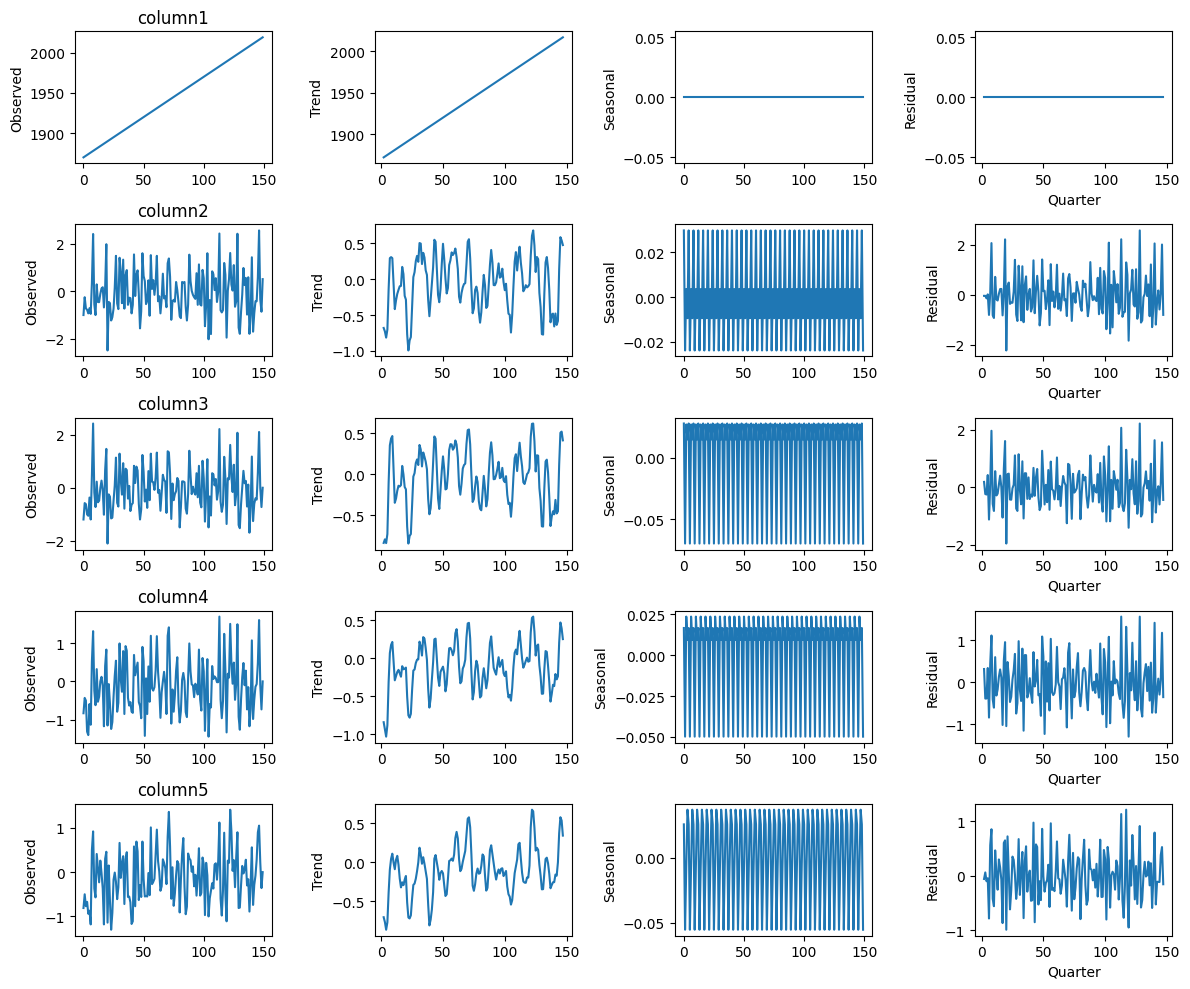

In [ ]:
import statsmodels.api as sm

y = df.loc[:, ['column1', 'column2','column3','column4','column5']] 

# Create a figure with subplots
fig, axs = plt.subplots(nrows=len(y.columns), ncols=4, figsize=(12, 10))

# Loop through each variable
for i, col in enumerate(y.columns):
    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(y[col], model='additive', period=4)

    # Plot the decomposed components
    axs[i, 0].plot(decomposition.observed)
    axs[i, 0].set_ylabel('Observed')
    axs[i, 1].plot(decomposition.trend)
    axs[i, 1].set_ylabel('Trend')
    axs[i, 2].plot(decomposition.seasonal)
    axs[i, 2].set_ylabel('Seasonal')
    axs[i, 3].plot(decomposition.resid)
    axs[i, 3].set_ylabel('Residual')
    axs[i, 3].set_xlabel('Quarter')
    axs[i, 0].set_title(col)

plt.tight_layout()
plt.show()

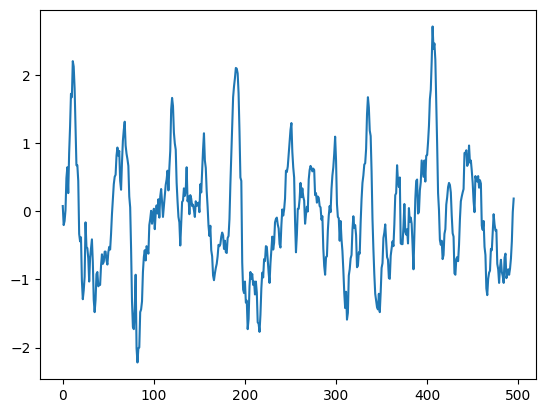

In [ ]:
plt.plot(list(range(len(sstoi['column10']))), sstoi['column10'])

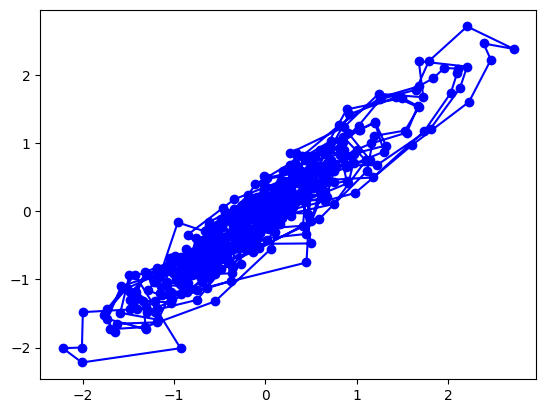

In [ ]:
def embed(points,DimEmb=2):
    auxembed=[]
    for i in range(0,len(points)-DimEmb+1):
        aux=[points[i+j] for j in range(DimEmb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed

embededcos=embed(list(sstoi['column10']),DimEmb=2)
plt.plot(embededcos[:,0],embededcos[:,1],marker='o',color='blue')

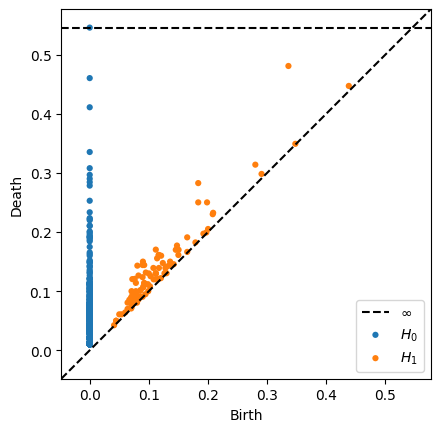

In [ ]:
ripsernonperiod=ripser.ripser(embededcos)['dgms']

persim.plot_diagrams(
    ripsernonperiod, 
    show=True
) 

In [ ]:
!pip install kmapper
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=58e618efb379906ffb6566a924856a4629ee118d995c5f6c736507f149746af2
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=01f0c22bae2312a2b14f2c17d7dcf49311a6d1ab19a098ac4bf0cae1d5cf272c
  Stored in directory: /root/.cache/pip/wheels/4a/38/5

In [ ]:
import yfinance as yf
import kmapper as km
from kmapper.jupyter import display
import umap #Uniform Manifold Approximation and Projection for Dimension Reduction
import sklearn
import sklearn.manifold as manifold #https://scikit-learn.org/stable/modules/manifold.html
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
lista_np=np.array(lista)

In [ ]:
y=range(0, 1788, 1)
y=np.array(y)

In [ ]:
lista_y = []
for i in range(149):
  for n in range(12): 
    lista_y.append(df['column1'][i])
len(lista_y)

1788

In [ ]:
z=np.asarray(lista_y)

In [ ]:
data_mapp = np.stack((lista_np, lista_y), axis=0)

In [ ]:
data_mapp=data_mapp.transpose()

In [ ]:
data_mapp.shape

(1788, 2)

In [ ]:
mapper = km.KeplerMapper(verbose=1)
projected_data = mapper.fit_transform(data_mapp, projection=[manifold.Isomap(n_components=100, n_jobs=-1), umap.UMAP(n_components=3,random_state=1)])#cambiar num compoentes,isomap otra funcion
G = mapper.map(projected_data, data_mapp, clusterer=sklearn.cluster.KMeans(n_clusters=7))

KeplerMapper(verbose=1)
..Composing projection pipeline of length 2:
	Projections: Isomap(n_components=100, n_jobs=-1)
		UMAP(n_components=3, random_state=1)
	Distance matrices: False
False
	Scalers: MinMaxScaler()
MinMaxScaler()
..Projecting on data shaped (1788, 2)

..Projecting data using: 
	Isomap(n_components=100, n_jobs=-1)



Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.


..Scaling with: MinMaxScaler()

..Projecting on data shaped (1788, 100)

..Projecting data using: 
	UMAP(n_components=3, random_state=1, verbose=1)

UMAP(n_components=3, random_state=1, verbose=1)
Fri Jun  2 22:00:26 2023 Construct fuzzy simplicial set
Fri Jun  2 22:00:34 2023 Finding Nearest Neighbors
Fri Jun  2 22:00:43 2023 Finished Nearest Neighbor Search
Fri Jun  2 22:00:51 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Fri Jun  2 22:01:00 2023 Finished embedding

..Scaling with: MinMaxScaler()

Mapping on data shaped (1788, 2) using lens shaped (1788, 3)

Creating 1000 hypercubes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang


Created 422 edges and 504 nodes in 0:00:04.863835.


In [ ]:
#definir un nombre de archivo para guardar los parámetros de Mapper
fileID = 'projection=' + G['meta_data']['projection'].split('(')[0] + '_' + \
'n_cubes=' + str(G['meta_data']['n_cubes']) + '_' + \
'perc_overlap=' + str(G['meta_data']['perc_overlap']) + '_' + \
'clusterer=' + G['meta_data']['clusterer'].split('(')[0] + '_' + \
'scaler=' + G['meta_data']['scaler'].split('(')[0]

mapper.visualize(G, 
                title=fileID,
                #custom_tooltips =z,
                color_values = z,
                color_function_name = 'Year',
                node_color_function=np.array(['average','std','sum','max','min']))

km.jupyter.display("mapper_example_" + fileID + ".html")

Wrote visualization to: mapper_visualization_output.html


/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning:

Consider using IPython.display.IFrame instead



In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model = ExponentialSmoothing(lista, trend='add', seasonal='add', seasonal_periods=18)
fit_model = model.fit(smoothing_level=0.1)
smooth = fit_model.fittedvalues

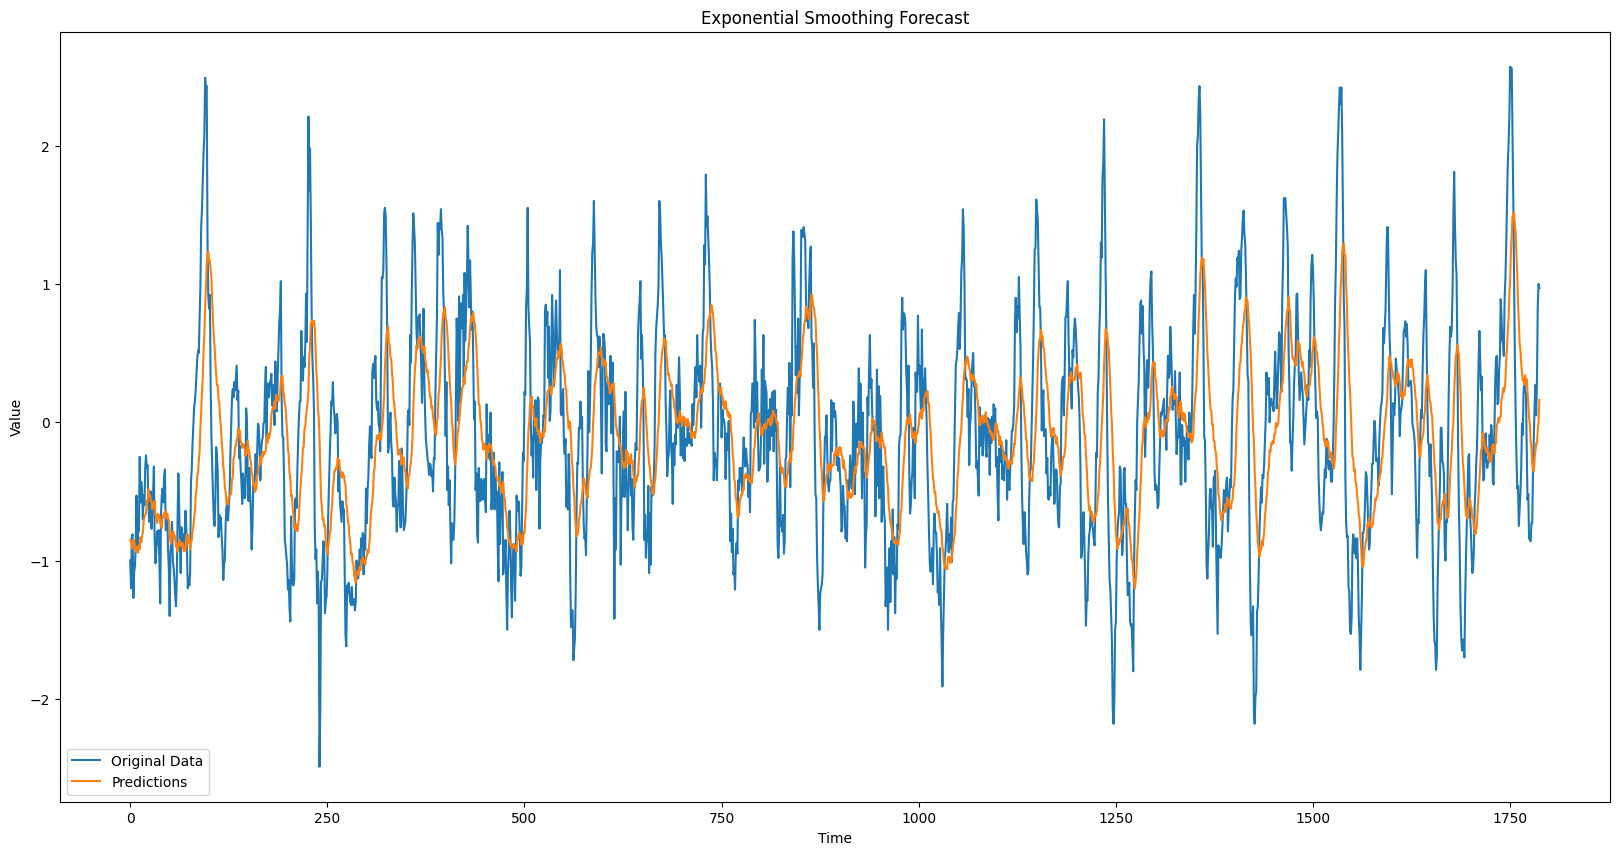

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(lista, label='Original Data')
plt.plot(smooth, label='Predictions')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Exponential Smoothing Forecast')
plt.show()

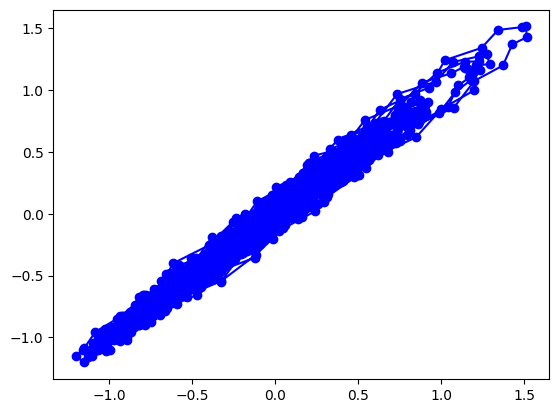

In [ ]:
def embed(points,DimEmb=2):
    auxembed=[]
    for i in range(0,len(points)-DimEmb+1):
        aux=[points[i+j] for j in range(DimEmb)]
        auxembed.append(aux)
    auxembed=np.array(auxembed)
    return auxembed

embededcos=embed(smooth,DimEmb=2)
plt.plot(embededcos[:,0],embededcos[:,1],marker='o',color='blue')

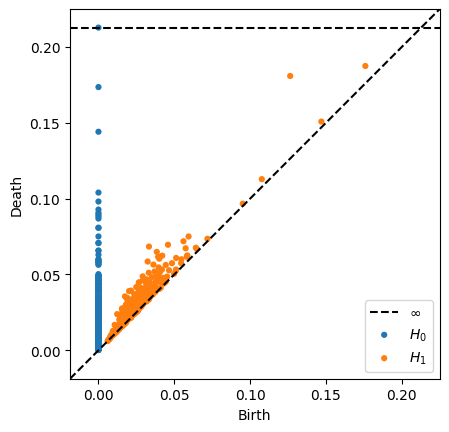

In [ ]:
ripsernonperiod=ripser.ripser(embededcos)['dgms']

persim.plot_diagrams(
    ripsernonperiod, 
    show=True
) 